## Visualisation: Network Graphs over time 

In [7]:
import pandas as pd
import os
from os.path import join

from dotenv import load_dotenv
load_dotenv()  

path = os.environ['PROJECT_PATH']

df_stats =pd.read_csv('outputs/stats_t1.csv', index_col=[0])

In [4]:
## transpose 
df_stats_t = df_stats.transpose()


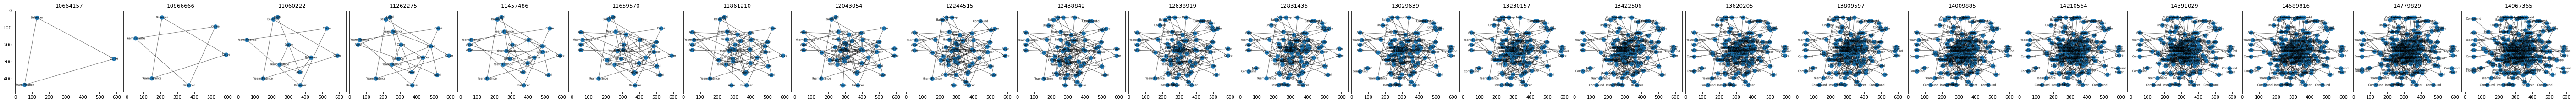

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid


## progression over time 
fig = plt.figure(figsize=(100, 100))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, len(df_stats_t.index[14:])),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )


for ax, snapshot in zip(grid,df_stats_t.index[14:]): 

    path_img = join(path, f'output_t1/pics/pic_vNetwork_{snapshot}.png')
    im = plt.imread(path_img)
    ax.imshow(im)
    ax.set_title(snapshot)


plt.show()



## Refinement of missing values 

In [196]:
df_stats_ts = df_stats_t[14:]
df_stats_ts.reset_index(inplace=True)
df_stats_ts.rename(columns={'index':'block_height'}, inplace=True)
df_stats_ts.block_height = df_stats_ts.block_height.astype('int')

/tmp/ipykernel_2256946/908725590.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2256946/908725590.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [197]:
# add date 
df_snapshot = pd.read_csv('assets/snapshot_selection.csv')
df_snapshot.columns = ['no', 'block_height', 'date']
df_summary_stats = df_snapshot[['block_height', 'date']].merge(df_stats_ts, how='inner',on='block_height')

df_summary_stats = df_summary_stats.round(3)

In [201]:
df_summary_stats[df_summary_stats.nodes.isna()]

,block_height,date,nodes,edges,avg_degree_path,min_degree_path,max_degree_path,diameter,avg_shortest_path,density,degree_centrality_avg,degree_centrality_min,degree_centrality_max,betweeness_centrality_avg,betweeness_centrality_min,betweeness_centrality_max,triangles_avg,triangles_min,triangles_max
10,12638919,2021-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,12831436,2021-07-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,13029639,2021-08-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,14009885,2022-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,14210564,2022-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [260]:
### refine

from ast import literal_eval
import networkx as nx 
block_height = 14210564

path = join( path, 'Tokens_data/output_t1/pvalues_{block_height}.csv')  ##path?

df = pd.read_csv(path)

df_r = df[df.m_test_result == True]


df_r.combination = df_r.combination.apply(lambda x: literal_eval(x))

G = nx.Graph()
G.add_edges_from(df_r.combination)


/tmp/ipykernel_2256946/1173695084.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



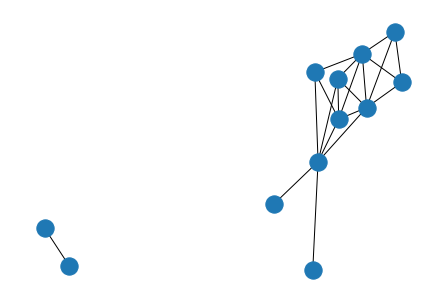

In [261]:
nx.draw(G)

In [262]:
import numpy as np

## descriptve statistic
g_nodes = G.number_of_nodes()
g_edges = G.number_of_edges()

## degree 
g_degrees = dict(G.degree())
# Calculate the average degree of the graph
g_avg_degree = sum(g_degrees.values()) / len(g_degrees)
g_max_degree = max(g_degrees.values())
g_min_degree = min(g_degrees.values())


# diameter
try:
    g_diameter = nx.diameter(G)
except:
    g_diameter = np.nan

# average shortest path
try:
    g_avg_shortest_path = nx.average_shortest_path_length(G)
except: 
    g_avg_shortest_path = np.nan


g_density = nx.density(G)

# centrality 
g_degree_centrality = dict(nx.degree_centrality(G))
g_degree_centrality_avg = sum(g_degree_centrality.values())/ len(g_degree_centrality)
g_degree_centrality_min = min(g_degree_centrality.values())
g_degree_centrality_max = max(g_degree_centrality.values())

# betweeness 
g_betweeness_centrality = dict(nx.betweenness_centrality(G))
g_betweeness_centrality_avg = sum(g_betweeness_centrality.values())/ len(g_betweeness_centrality)
g_betweeness_centrality_min = min(g_betweeness_centrality.values())
g_betweeness_centrality_max = max(g_betweeness_centrality.values())

# triangles 
g_triangles = dict(nx.triangles(G))
g_triangles_avg = sum(g_triangles.values())/ len(g_triangles)
g_triangles_min = min(g_triangles.values())
g_triangles_max = max(g_triangles.values())

# g_clustering = dict(nx.clustering(G))
# g_clustering_avg = sum(g_clustering.values())/ len(g_clustering)
# g_clustering_min = min(g_clustering.values())
# g_clustering_max = max(g_clustering.values())

stats = {'nodes': g_nodes, 'edges': g_edges, 
'avg_degree_path': g_avg_degree, 'min_degree_path': g_min_degree, 'max_degree_path': g_max_degree,
'diameter': g_diameter,
'avg_shortest_path': g_avg_shortest_path, 'density': g_density,
'degree_centrality_avg': g_degree_centrality_avg, 'degree_centrality_min': g_degree_centrality_min, 'degree_centrality_max': g_degree_centrality_max, 
'betweeness_centrality_avg': g_betweeness_centrality_avg, 'betweeness_centrality_min': g_betweeness_centrality_min, 'betweeness_centrality_max': g_betweeness_centrality_max,
'triangles_avg': g_triangles_avg, 'triangles_min': g_triangles_min, 'triangles_max': g_triangles_max}
# 'clustering_avg': g_clustering_avg, 'clustering_min': g_clustering_min, 'clustering_max': g_clustering_max }

In [248]:
# df_summary_stats.set_index('block_height', inplace=True)

In [263]:
# for key in stats:
    
#     df_summary_stats.loc[block_height,key] = stats[key]

In [284]:
## fully connected
df_summary_stats['fully_connected'] = (df_summary_stats.diameter.isna() == False)

In [295]:
# df_summary_stats.to_csv('stats_t1_refined.csv')

In [293]:
df_summary_stats.set_index('index', inplace=True)

## Visualisation: Summary statistics table 


In [294]:
import plotly.graph_objects as go
import pandas as pd


# NOTE: ADDD COLUMN FOR POSSIBLE EDGES 

fig = go.Figure(data=[go.Table(
    header=dict(values=list(df_summary_stats.columns)),
    cells=dict(values=[df_summary_stats.block_height, 
                      df_summary_stats.date,
                      df_summary_stats.nodes,
                      df_summary_stats.edges,
                      df_summary_stats.avg_degree_path,
                      df_summary_stats.min_degree_path,
                      df_summary_stats.max_degree_path, 
                      df_summary_stats.diameter,
                      df_summary_stats.avg_shortest_path,
                      df_summary_stats.density,
                      df_summary_stats.degree_centrality_avg,
                      df_summary_stats.degree_centrality_min,
                      df_summary_stats.degree_centrality_max,
                      df_summary_stats.betweeness_centrality_avg,
                      df_summary_stats.betweeness_centrality_min,
                      df_summary_stats.betweeness_centrality_max,
                      df_summary_stats.triangles_avg,
                      df_summary_stats.triangles_min,
                      df_summary_stats.triangles_max, 
                      df_summary_stats.fully_connected]))
])

fig.show()

## Visualisation: Individual Summary Statistics 

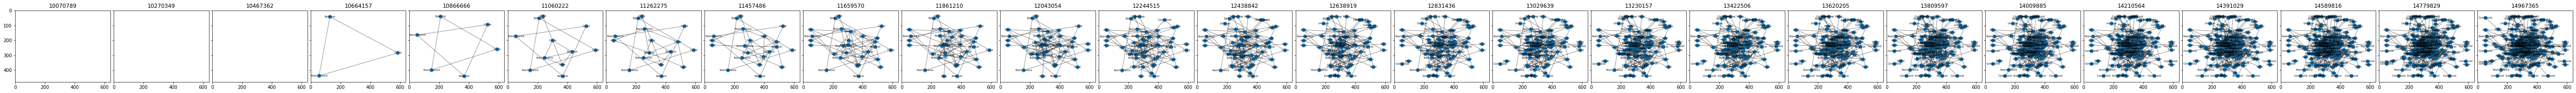

In [264]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid


## progression over time 
fig = plt.figure(figsize=(100, 100))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 26),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )


for ax, snapshot in zip(grid,df_stats_t.index[11:]): 

    path_img = f'/local/scratch/exported/governance-erc20/project_erc20_governanceTokens_data/output_t1/pics/pic_vNetwork_{snapshot}.png'
    im = plt.imread(path_img)
    ax.imshow(im)
    ax.set_title(snapshot)


plt.show()






In [265]:

import plotly.express as px

fig = px.line(data_frame=df_summary_stats, x='date', y='edges') 
fig.show()

In [266]:
fig = px.line(data_frame=df_summary_stats, x='date', y='nodes') 
fig.show()

In [267]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(
            x=df_summary_stats.date,
            y=df_summary_stats.avg_degree_path,
            error_y=dict(
                type='data',
                symmetric=False,
                array=df_summary_stats.max_degree_path,
                arrayminus=df_summary_stats.min_degree_path
                ),
            ),
            layout=go.Layout(title=go.layout.Title(text="Average/ Minimum/ Maximum Degree Path"))
)
fig.show()


In [268]:
fig = px.line(data_frame=df_summary_stats, x='date', y='diameter', title='Diameter') 
fig.show()

In [269]:
fig = px.line(data_frame=df_summary_stats, x='date', y='avg_shortest_path', title='Average Shortest Path') 
fig.show()

In [270]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(
            x=df_summary_stats.date,
            y=df_summary_stats.degree_centrality_avg,
            error_y=dict(
                type='data',
                symmetric=False,
                array=df_summary_stats.degree_centrality_max,
                arrayminus=df_summary_stats.degree_centrality_min
                ),
            ),
            layout=go.Layout(title=go.layout.Title(text="Average/ Minimum/ Maximum Degree Centrality"))
)
fig.show()

In [271]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(
            x=df_summary_stats.date,
            y=df_summary_stats.degree_centrality_avg,
            error_y=dict(
                type='data',
                symmetric=False,
                array=df_summary_stats.degree_centrality_max,
                arrayminus=df_summary_stats.degree_centrality_min
                ),
            ),
            layout=go.Layout(title=go.layout.Title(text="Average/ Minimum/ Maximum Degree Centrality"))
)
fig.show()

In [273]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(
            x=df_summary_stats.date,
            y=df_summary_stats.betweeness_centrality_avg,
            error_y=dict(
                type='data',
                symmetric=False,
                array=df_summary_stats.betweeness_centrality_max,
                arrayminus=df_summary_stats.betweeness_centrality_min
                ),
            ),
            layout=go.Layout(title=go.layout.Title(text="Average/ Minimum/ Maximum Betweenness Centrality"))
)
fig.show()

In [274]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(
            x=df_summary_stats.date,
            y=df_summary_stats.triangles_avg,
            error_y=dict(
                type='data',
                symmetric=False,
                array=df_summary_stats.triangles_max,
                arrayminus=df_summary_stats.triangles_min
                ),
            ),
            layout=go.Layout(title=go.layout.Title(text="Average/ Minimum/ Maximum Triangles"))
)
fig.show()